<a href="https://colab.research.google.com/github/sh01k/MeshRIR/blob/main/ir_view_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#========== Download data and codes ========== 
%cd /content
!git clone https://github.com/sh01k/MeshRIR.git
%cd /content/MeshRIR
!wget https://zenodo.org/record/5500451/files/S1-M3969_npy.zip
!unzip /content/MeshRIR/S1-M3969_npy.zip 

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: __MACOSX/S1-M3969_npy/._ir_1282.npy  
  inflating: S1-M3969_npy/ir_499.npy  
  inflating: __MACOSX/S1-M3969_npy/._ir_499.npy  
  inflating: S1-M3969_npy/ir_2984.npy  
  inflating: __MACOSX/S1-M3969_npy/._ir_2984.npy  
  inflating: S1-M3969_npy/ir_3442.npy  
  inflating: __MACOSX/S1-M3969_npy/._ir_3442.npy  
  inflating: S1-M3969_npy/ir_1255.npy  
  inflating: __MACOSX/S1-M3969_npy/._ir_1255.npy  
  inflating: S1-M3969_npy/ir_300.npy  
  inflating: __MACOSX/S1-M3969_npy/._ir_300.npy  
  inflating: S1-M3969_npy/ir_1533.npy  
  inflating: __MACOSX/S1-M3969_npy/._ir_1533.npy  
  inflating: S1-M3969_npy/ir_466.npy  
  inflating: __MACOSX/S1-M3969_npy/._ir_466.npy  
  inflating: S1-M3969_npy/ir_3324.npy  
  inflating: __MACOSX/S1-M3969_npy/._ir_3324.npy  
  inflating: S1-M3969_npy/ir_3330.npy  
  inflating: __MACOSX/S1-M3969_npy/._ir_3330.npy  
  inflating: S1-M3969_npy/ir_1527.npy  
  inflating: __MACOSX/S1-M3969_npy/._ir_1527.npy  
  inflating: 

In [19]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from pathlib import Path

import irutilities as irutil

In [20]:
#========== Load IR data ==========
sessionName = "S1-M3969_npy"  # "S32-M441_npy"
sessionPath = Path('.').joinpath(sessionName)
posMic, posSrc, ir = irutil.loadIR(sessionPath)

# Sampling rate
samplerate = 48000

# Select IR data
srcIdx = 0
micIdx = 0
print("Source position (m): ", posSrc[srcIdx, :])
print("Mic position (m): ", posMic[micIdx, :])

Source position (m):  [2.  1.5 0. ]
Mic position (m):  [-0.5 -0.5 -0.2]


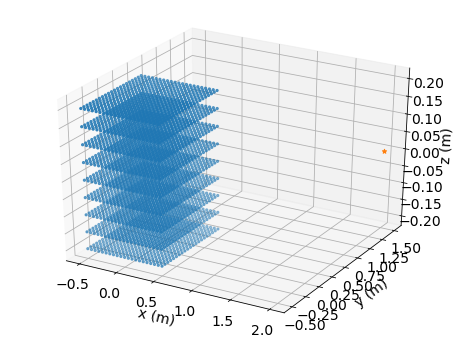

In [21]:
#========== Plot geometry ==========
irutil.drawGeometry(posSrc, posMic)

RT60 (ms):  387.5


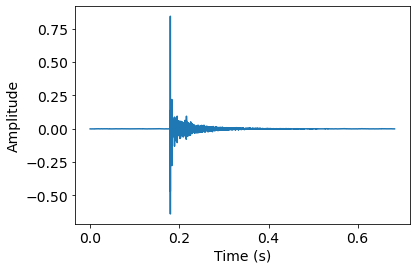

In [22]:
#========== IR plots ==========
ir_plt = ir[srcIdx, micIdx, :]
irutil.irPlots(ir_plt, samplerate)

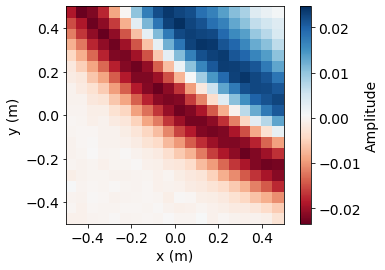

In [23]:
#========== Wave image ==========
# Extract xy-plane at z=0
z = 0.0
posMic_z, ir_z = irutil.extract_plane(posMic, ir, z)
posMicX = np.unique(posMic_z[:, 0].round(4))
posMicY = np.unique(posMic_z[:, 1].round(4))
numXY = (posMicX.shape[0], posMicX.shape[0])
posMicXY, irXY, _ = irutil.sortIR(posMic_z, ir_z, numXY, posMicX, posMicY)
    
# Lowpass filter
maxFreq = 600
h = signal.firwin(numtaps=64, cutoff=maxFreq, fs=samplerate)
irXY_lp= signal.filtfilt(h, 1, irXY[srcIdx,:,:,:], axis=-1)

# Wave image
tIdx, _ = irutil.findPeak(irXY_lp, 0)
irutil.plotWave(posMicX, posMicY, irXY_lp, tIdx)
# irutil.plotWaveFronts(posMicX, irXY_lp, samplerate)

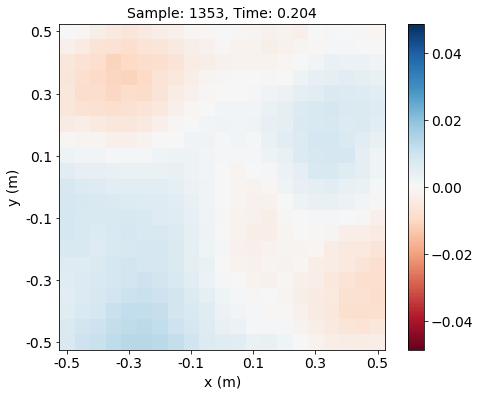

In [24]:
#========== Wave movie ==========
irutil.movWave(sessionPath, posMicX, posMicY, irXY_lp, samplerate)